In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('linregdata.txt',header=None) # read the txt file

# Part(a) was done by pandas.get_dummies

In [3]:
def NormalizeTrainData(df):
    df_normalize=df.drop([8],axis=1)
    # perform onehot-encoding/get dummies for the first column 
    train = pd.concat([pd.get_dummies(df[0], prefix='Category'),df_normalize],axis=1)
    # drop the first column as we have encoded it now
    train = train.drop([0],axis=1)
    #PART-B of normalization is done
    mean= train.mean()
    std = train.std()
    train=((train-mean)/(std))
    train = pd.concat([train,df[8]],axis=1)
    
    train = train.values
    return train,mean,std

In [4]:
def SplitFeaturesandLabel(train):
    return train[:,:-1],train[:,-1]

In [5]:
#normalize the test data by removing the test labels and also one hot encode the first column. Normalize the
#columns with the mean and std of the training data
def NormalizeTestData(test,mean,std):
    df_normalize_test= test.drop([8],axis=1)
    test_features = pd.concat([pd.get_dummies(test[0], prefix='Category'),df_normalize_test],axis=1)
    test_features = test_features.drop([0],axis=1)
    test_features = (test_features-mean)/std
    test_features = test_features.values
    return test_features

# Part (c) Implementation of the 3 functions

In [6]:
def mylinridgereg(X,Y,lamb):
    pseudoterm= np.dot(X.T,X)+ lamb*np.identity(X.shape[1]) # (X.XT+ lmean_squared_erroramba.I)^+
    pseudo = np.linalg.pinv(pseudoterm)
    
    weights_part= np.dot(X.T,Y)
    weights= np.dot(pseudo,weights_part)

    return weights

In [7]:
def mylinridgeregeval(X,weights):
    return np.dot(X,weights)+10 # Here 10 is added as the bias

In [8]:
def meansquarederr(T, Tdash):
    return mean_squared_error(T,Tdash)

In [9]:
def getweight_Lambda_minMSE(train_features, train_labels,test_features, test_labels):
    min_val=100
    min_lambd=0
    min_weights=0
    for lambd in [0.0001,0.001,0.01,0.1,1]:
        weights=mylinridgereg(train_features,train_labels,lambd)
        predicted_values_train = mylinridgeregeval(train_features,weights)
        predicted_values_test = mylinridgeregeval(test_features, weights)
        train_error= meansquarederr(train_labels, predicted_values_train)
        test_error = meansquarederr(test_labels,predicted_values_test)
        if min_val > test_error:
            min_val= test_error
            min_lambd= lambd
            min_weights = weights
    print("Minimum lambda, training and testing error::") # Printing the min testing error and its lambda value
    print("For lambda of ",min_lambd)
    print("Testing error ",min_val)
    return weights,min_val,min_lambd

In [10]:
# split the data into test data, train data, test label, training label
def preProcessInput(df,test_percent,randomStateRequired):
    initial_train, test = train_test_split(df, test_size=test_percent)
    if randomStateRequired==True:
        initial_train, test = train_test_split(df, test_size=test_percent,random_state=42) 
    train,mean,std= NormalizeTrainData(initial_train)
    
    train_features,train_labels= SplitFeaturesandLabel(train)
    
    test_labels = test[8]
    test_features= NormalizeTestData(test,mean,std)
    
    return train_features, train_labels,test_features, test_labels

# Functions over. Implementation for D,E,F,G,H

# Part(d) of splitting into train and test

In [11]:
train_features, train_labels,test_features, test_labels = preProcessInput(df,0.2,True)

# Part (e) Find the minimum lambda and examine the weight matrix

In [12]:
weights,min_error,min_lambd=getweight_Lambda_minMSE(train_features, train_labels,test_features, test_labels)
print("For lambda of ",min_lambd," MSE is ",min_error)
print("Weight matrix is ",weights)

Minimum lambda, training and testing error::
For lambda of  1
Testing error  4.895003170414433
For lambda of  1  MSE is  4.895003170414433
Weight matrix is  [ 0.09342483 -0.24332658  0.14610097 -0.01717409  1.0872976   0.44503352
  4.17212539 -4.41269943 -0.99748051  1.30426044]


In [13]:
sorted_weights_list = sorted(map(abs,weights))
min_weight1,min_weight2,min_weight3= sorted_weights_list[0],sorted_weights_list[1],sorted_weights_list[2]
print("The most important features in terms of magnitude is ",sorted_weights_list[-1],sorted_weights_list[-2],sorted_weights_list[-3])
print("The min in terms of magnitude are ",min_weight1,min_weight2,min_weight3)

The most important features in terms of magnitude is  4.412699432418208 4.172125386492553 1.3042604392863169
The min in terms of magnitude are  0.01717409203112652 0.0934248327126852 0.14610096940305084


In [14]:
weight_list= weights.tolist()
if min_weight1 not in weight_list:
    min_weight1=-1*min_weight1
if min_weight2 not in weight_list:
    min_weight2=-1*min_weight2
if min_weight3 not in weight_list:
    min_weight3=-1*min_weight3
#delete_col1,delete_col2= weight_list.index(min_weight1),weight_list.index()

In [15]:
delete_col1, delete_col2,delete_col3 = weight_list.index(min_weight1),weight_list.index(min_weight2),weight_list.index(min_weight3)
print("Column to be deleted is ",delete_col1," ",delete_col2," ",delete_col3)

Column to be deleted is  3   0   2


In [16]:
train_features_1=np.delete(train_features, [delete_col1,delete_col2,delete_col3] ,1)
test_features_1= np.delete(test_features ,[delete_col1,delete_col2,delete_col3] ,1)

In [17]:
print("After removing the 3 features from the input data based on the value of weight matrix absolue values")
weights,min_error,min_lambd=getweight_Lambda_minMSE(train_features_1, train_labels,test_features_1, test_labels)
print("For lambda of ",min_lambd," MSE is ",min_error)

After removing the 3 features from the input data based on the value of weight matrix absolue values
Minimum lambda, training and testing error::
For lambda of  1
Testing error  4.889070742658447
For lambda of  1  MSE is  4.889070742658447


####  For (e) , the Testing error changed from 4.895003170414433 to 4.889070742658447 and 
#### on removing the columns whose weights are close to 0( it is column 0 ,2 and 3). 
#### These errors are obtained for the lambda value of 1. 

# Part(f) Plotting the graphs 

### the error changes for different partitions of the training and testing data (it does not remain  constant)

In [18]:
lambda_array=[np.random.rand() for x in range(25)] # Let lambda take 25 values from 0 to 1 
lambda_array= np.sort(lambda_array) # sort the values of lambda
partition_split=[0.1,0.2,0.3,0.4,0.5,0.6]
testing_error_min_per_partition=[]
training_error_min_per_partition=[]
lambda_min_per_partition=[]
lambda_min_per_partition_t=[]

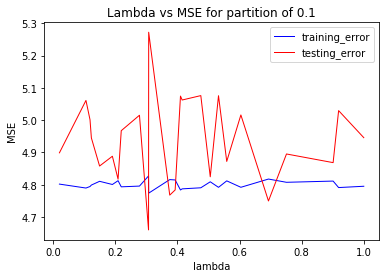

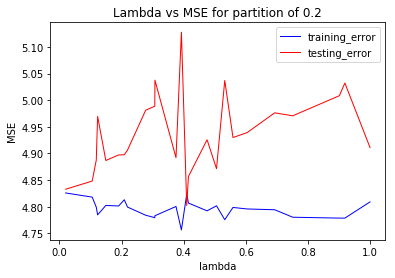

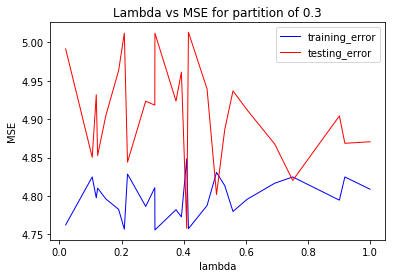

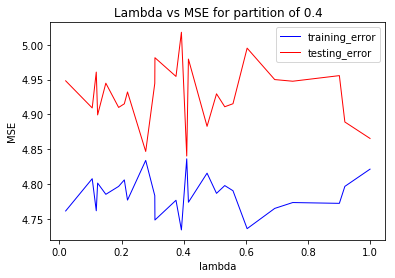

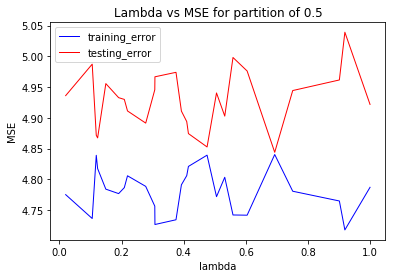

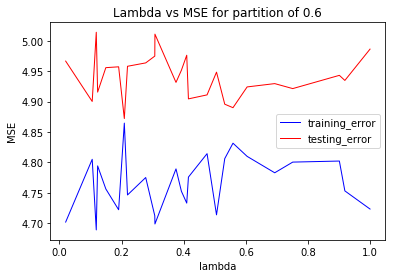

In [19]:
for i in range(len(partition_split)):
    plot_mse_test=[]
    plot_mse_train=[]
    min_error=100
    min_error_t=100
    min_lambda=10
    min_lambda_t=10
    for k in range(len(lambda_array)):
        training_error=[]
        testing_error=[]
        average_error_per_lambda_test=0
        average_error_per_lambda_train=0
        for j in range(0,25):
            train_features, train_labels,test_features, test_labels = preProcessInput(df,partition_split[i],False)
            weights=mylinridgereg(train_features,train_labels,lambda_array[k]) # get the weights from training data
            predicted_values= mylinridgeregeval(train_features, weights) # get the predicted labels of train
            error= meansquarederr(train_labels,predicted_values) # calculate the MS error if the train labels
            training_error.append(error)
            predicted_values= mylinridgeregeval(test_features, weights) # predict the test values using the training weights
            error= meansquarederr(test_labels,predicted_values) # calculate the MS error of the redicted values
            testing_error.append(error)        
        average_error_per_lambda_test=sum(testing_error) / float(len(testing_error))
        # get the minimum average MSE per lambda of test data per partition split
        if min_error> average_error_per_lambda_test:
            min_error = average_error_per_lambda_test
            min_lambd = lambda_array[k]
        plot_mse_test.append(average_error_per_lambda_test)
        average_error_per_lambda_train=sum(training_error) / float(len(training_error))
        #get the minimum average MSE per lambda of training data per partition split
        if min_error_t>error:
                min_error_t= error
                min_lambd_t= lambda_array[k]
        plot_mse_train.append(average_error_per_lambda_train)
    testing_error_min_per_partition.append(min_error)
    training_error_min_per_partition.append(min_error_t)
    lambda_min_per_partition.append(min_lambd)
    lambda_min_per_partition_t.append(min_lambd_t)
    plt.plot(lambda_array,plot_mse_train,color='blue',markerfacecolor='blue',markersize=4,linewidth=1,label='training_error')
    plt.plot(lambda_array,plot_mse_test,color='red',markerfacecolor='red',markersize=4,linewidth=1,label='testing_error')
    plt.xlabel('lambda')
    plt.ylabel('MSE')
    titleStr='Lambda vs MSE for partition of '+str(partition_split[i])
    plt.title(titleStr)
    plt.legend()
    plt.show()

# Part(g) 

### Yes there is an effect. the min average  MSE varies for various partition splits. It  either increases or decreases. It cannot be told with certainity as we get a different training and testing data every time we run the loop/code.  

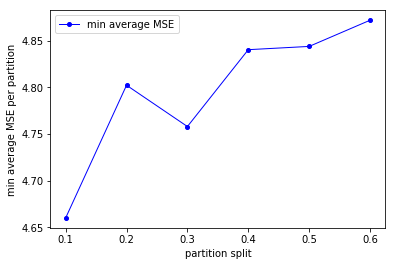

In [20]:
# plot the minimum averge MSE per partition vs the partition split
plt.plot(partition_split,testing_error_min_per_partition,color='blue',marker='o',label='min average MSE',markerfacecolor='blue',markersize=4,linewidth=1)
plt.xlabel("partition split")
plt.ylabel("min average MSE per partition")
plt.legend()
plt.show()

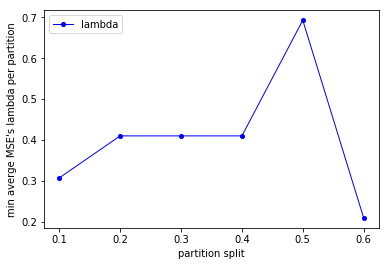

In [21]:
# plot the lambda value that gave the minimum averge MSE vs the partition split
plt.plot(partition_split,lambda_min_per_partition,color='blue',label='lambda',marker='o',markerfacecolor='blue',markersize=4,linewidth=1)
plt.xlabel("partition split")
plt.ylabel("min averge MSE's lambda per partition")
plt.legend()
plt.show()

# Part (h)

### the model looks very good as most of the training and testing points are very close to the 45 degree line ( line passing through the origin) . This would indeed create a good model. 

In [22]:
# get the optimum partition split and the lambda from the inimum average MSE of training data
min_partition_index= training_error_min_per_partition.index(min(training_error_min_per_partition))
optimum_lambda =  lambda_min_per_partition_t[min_partition_index]
optimum_partition_split = partition_split[min_partition_index]
print("Optimum partition split ",optimum_partition_split)
print("Lambda for that split ",optimum_lambda)

Optimum partition split  0.2
Lambda for that split  0.4098469049682101


In [23]:
# split the data based on the partition split obtained
train_features, train_labels,test_features, test_labels = preProcessInput(df,optimum_partition_split,False)

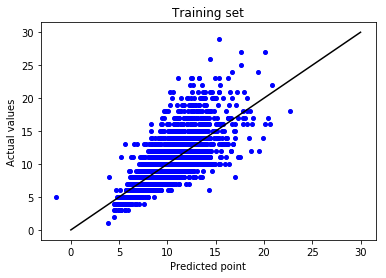

In [24]:
#calculate the weights and predict the training MSE and plot the predicted vs the actual labels. All the points drawn
# are very close to the 45 degree line that passes through the origin
weights=mylinridgereg(train_features,train_labels,optimum_lambda)
predicted_values= mylinridgeregeval(train_features, weights)
plt.plot(predicted_values,train_labels,color='blue',marker='o',markerfacecolor='blue',markersize=4,linewidth=0)
plt.plot([0,30],[0,30],color='black')
plt.xlabel("Predicted point")
plt.ylabel("Actual values")
plt.title("Training set")
plt.show()

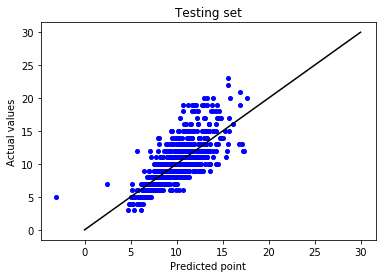

In [25]:
# using the training weights, predict the test labels, plot the predicted vs the actual labels. All the points drawn
# are very close to the 45 degree line that passes through the origin. 
predicted_values= mylinridgeregeval(test_features, weights)
plt.plot(predicted_values,test_labels,color='blue',marker='o',markerfacecolor='blue',markersize=4,linewidth=0)
plt.plot([0,30],[0,30],color='black')
plt.xlabel("Predicted point")
plt.ylabel("Actual values")
plt.title("Testing set")
plt.show()